# Types of Regression & Regression Analysis
The short script aims to explore types of regression as well as practice with regression analysis

### Type of Regressions: 
* <b>Linear Regression</b>: Model the relationship between two variables by fitting a linear equation to observed data. One variable is considered independent variable and the other is the dependent variable
* <b>Polymonial Regression</b>: Similar to Linear Regression but instead of fitting a linear equation, it fits a polynomial equation instead
* <b>Multiple Regression</b>: A regression that takes more than one variable (feature) into account.

R-squared (also known as Coefficient of Determination): You use it to evalute the fit of your model. The R-squared values ranges from zero to one. Zero means your fit is terrible = it doesn't capture any of the variance in your data. One is a perfect fit = all of variance in your data gets captured by this line.

For more info:
* http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm
* https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb
* http://www.stat.yale.edu/Courses/1997-98/101/linmult.htm

## Step 1: Setup

In [1]:
# Imports
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
import scipy.stats as ss

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Note: There is a bug on UserWarning with FixedLocator so just Ignore the warning
# https://github.com/pandas-dev/pandas/pull/35946
import warnings
warnings.filterwarnings("ignore")

## Step 2: Linear Regressions

### Generated Dataset

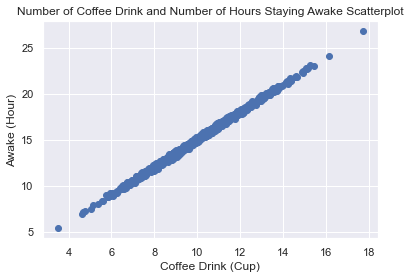

In [3]:
# As you drink more coffee, the number of hours you stay awake increases
coffee = np.random.normal(10, 2, 1000)
awakeHours = (coffee + np.random.normal(0, 0.1, 1000)) * 1.5

# Plot the data
plt.scatter(coffee, awakeHours)
plt.xlabel('Coffee Drink (Cup)')
plt.ylabel('Awake (Hour)')
plt.title('Number of Coffee Drink and Number of Hours Staying Awake Scatterplot')
plt.show()

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

# Calculate using linregress() method
slope, intercept, r_value, p_value, std_err = ss.linregress(coffee, awakeHours)

# Check the R value
print("Value of R squared value is ", r_value ** 2)    # Same as r_value * r_value

Value of R squared value is  0.9974062930930052


The Line of best fit function: y = 1.49691357440505 x + 0.041609025440660474


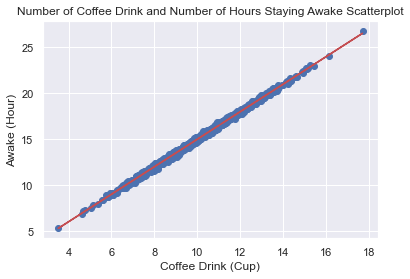

In [5]:
# Plot the Line of best fit

# Calculate for the fit line using slope and intercept from above
fitLine = slope * coffee + intercept
print("The Line of best fit function: y =", slope, "x +", intercept)

# Plot the scatter plot along the Line of best fit
plt.scatter(coffee, awakeHours)
plt.plot(coffee, fitLine, c='r')
plt.xlabel('Coffee Drink (Cup)')
plt.ylabel('Awake (Hour)')
plt.title('Number of Coffee Drink and Number of Hours Staying Awake Scatterplot')
plt.show()

### Actual Dataset 

In [6]:
# Load the dataset
df = pd.read_csv('data/female_literacy_fertility.csv')
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [7]:
# Take out the two features we want to use
illiteracy = 100 - df['female literacy']
fertility = df['fertility']

In [8]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html

# Calculate using polyfit() and poly1d() methods
poly_coefficients = np.polyfit(x = illiteracy, y = fertility, deg = 1)
print("Slope: %f\t\tIntercept: %f" % (poly_coefficients[0], poly_coefficients[1]))

poly1d_function = np.poly1d(poly_coefficients)
print("\nLine of best fit function:", poly1d_function)

Slope: 0.049799		Intercept: 1.888051

Line of best fit function:  
0.0498 x + 1.888


In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score

# Check the R value
r2 = r2_score(fertility, poly1d_function(illiteracy))
print("Value of R squared value is ", r2)    

Value of R squared value is  0.6466289210423777


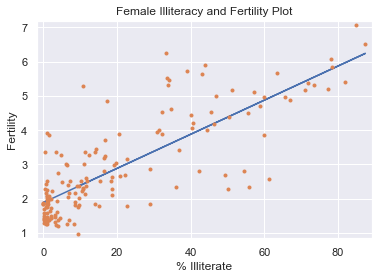

In [10]:
# Plot line of best fit & illiteracy rate versus fertility
plt.plot(illiteracy, poly1d_function(illiteracy));
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
plt.xlabel('% Illiterate')
plt.ylabel('Fertility')
plt.title("Female Illiteracy and Fertility Plot")
plt.show()

## Step 3: Polynomial Regressions

### Generated Dataset

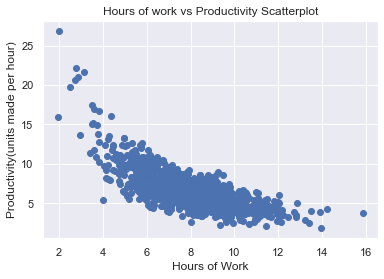

In [11]:
# The more hours you work, the less productivity per hour (units made per hour)
workHours = np.random.normal(8, 2, 1000)
productivity = np.random.normal(50.0, 10.0, 1000) / workHours

# Plot the data
plt.scatter(workHours, productivity)
plt.xlabel('Hours of Work')
plt.ylabel('Productivity(units made per hour)')
plt.title('Hours of work vs Productivity Scatterplot')
plt.show()

In [12]:
# Calculate using polyfit() and poly1d() methods
poly_coefficients = np.polyfit(x = workHours, y = productivity, deg = 4)
print("Slope: %f\t\tIntercept: %f" % (poly_coefficients[0], poly_coefficients[1]))

p4_function = np.poly1d(poly_coefficients)
print("\nLine of best fit function:", p4_function)

Slope: 0.003375		Intercept: -0.135362

Line of best fit function:           4          3         2
0.003375 x - 0.1354 x + 2.016 x - 13.82 x + 43.35


In [13]:
# Check the R value
r2_poly = r2_score(productivity, p4_function(workHours))
print("Value of R squared value is ", r2_poly)   

Value of R squared value is  0.6702109042497062


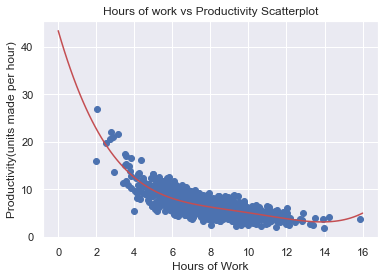

In [14]:
# Plot
x_poly = np.linspace(0, 16, 100)
plt.scatter(workHours, productivity)
plt.plot(x_poly, p4_function(x_poly), c='r')
plt.xlabel('Hours of Work')
plt.ylabel('Productivity(units made per hour)')
plt.title('Hours of work vs Productivity Scatterplot')
plt.show()

## Step 4: Multiple Regressions

### Actual Dataset 

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston

# Load the dataset
boston = load_boston()

# Print feature Names
print("Feature Names: ", boston.feature_names)

Feature Names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [16]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
# Convert to Dataframe so it is easier to work with

df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['Target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
# Summary of the datasets
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
# Figure out the max and min value of Room to split into buckets/bins
roomMAX, roomMIN = df_boston['RM'].max(), df_boston['RM'].min()
print("Max value for room: ", roomMAX)
print("Min value for room: ", roomMIN)

Max value for room:  8.78
Min value for room:  3.561


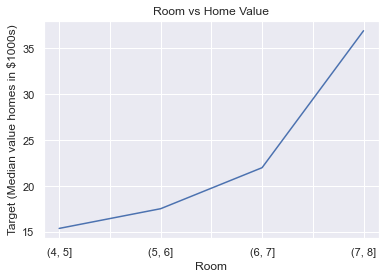

              RM     Target
RM                         
(4, 5]  4.711714  15.407143
(5, 6]  5.730382  17.551592
(6, 7]  6.403275  22.015985
(7, 8]  7.371667  36.917647


In [20]:
# Plot the dataset based on buckets/bins
room_df = df_boston[['RM','Target']]
bins = np.arange(round(roomMIN), round(roomMAX), 1)

# Plot
groups = room_df.groupby(pd.cut(room_df['RM'],bins)).mean()
groups['Target'].plot.line()
plt.xlabel('Room')
plt.ylabel('Target (Median value homes in $1000s)')
plt.title('Room vs Home Value')
plt.show()

print(groups.head())

### Make sure to have statsmodels installed:
* conda install -c conda-forge statsmodels <b>OR</b>
* pip install statsmodels

https://www.statsmodels.org/stable/install.html

In [21]:
# Split the data into X (independent variables) and y (dependent variable)
X = df_boston[['CRIM','ZN','INDUS','RM','TAX']]
y = df_boston[['Target']]

X.head()

,CRIM,ZN,INDUS,RM,TAX
0,0.00632,18.0,2.31,6.575,296.0
1,0.02731,0.0,7.07,6.421,242.0
2,0.02729,0.0,7.07,7.185,242.0
3,0.03237,0.0,2.18,6.998,222.0
4,0.06905,0.0,2.18,7.147,222.0


In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

X_transformed = scaler.fit_transform(X)

X_df = pd.DataFrame(X_transformed,columns=['CRIM','ZN','INDUS','RM','TAX'])
X_df.head()

,CRIM,ZN,INDUS,RM,TAX
0,-0.419782,0.284830,-1.287909,0.413672,-0.666608
1,-0.417339,-0.487722,-0.593381,0.194274,-0.987329
2,-0.417342,-0.487722,-0.593381,1.282714,-0.987329
3,-0.416750,-0.487722,-1.306878,1.016303,-1.106115
4,-0.412482,-0.487722,-1.306878,1.228577,-1.106115


In [23]:
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
import statsmodels.api as sm

# Use the Ordinary Least Squares method to fit the dataset
estimate = sm.OLS(y, X_df).fit()
estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.083
Model:                            OLS   Adj. R-squared (uncentered):              0.073
Method:                 Least Squares   F-statistic:                              9.021
Date:                Mon, 21 Sep 2020   Prob (F-statistic):                    3.19e-08
Time:                        22:15:16   Log-Likelihood:                         -2311.3
No. Observations:                 506   AIC:                                      4633.
Df Residuals:                     501   BIC:                                      4654.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -1.1983      1.286     -0.932      0.352      -3.724       1.328
ZN             0.7329      1.252      0.585      0.559      -1.728       3.193
INDUS         -0.3595      1.731     -0.208      0.836      -3.761       3.042
RM             5.2984      1.145      4.628      0.000       3.049       7.548
TAX           -1.5695      1.702     -0.922      0.357      -4.914       1.775
==============================================================================
Omnibus:                      269.687   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2481.762
Skew:                           2.147   Prob(JB):                         0.00
Kurtosis:                      12.964   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Based on the summary above, RM (average number of rooms per dwelling) is the most 
# significant attribute out of the 5 tested
y.groupby(pd.cut(room_df['RM'],bins)).mean()

,Target
RM,
"(4, 5]",15.407143
"(5, 6]",17.551592
"(6, 7]",22.015985
"(7, 8]",36.917647


In [25]:
# Try to predict with new data

# df_boston[['CRIM','ZN','INDUS','RM','TAX']]
scaledData = scaler.transform([[0, 0.25, 5, 10, 50]])
predicted = estimate.predict(scaledData[0])

print("Scaled Data:", str(scaledData)[1:-1])
print("Predicted House value:", str(predicted)[1:-1])

Scaled Data: [-0.42051742 -0.47699247 -0.89541336  5.29312785 -2.1276718 ]
Predicted House value: 31.86084188
